# ***Ejemplo Clasificación de Iris Data Set (2 características)***
# ***Usando algoritmo de SVM (Scikit-Learn) para tres Clases usando el concepto de OvR (One versus Rest) / OvA (One versus All)***

Desarrollado por: Profesor Felipe Palta

felipe.palta@javerianacali.edu.co

**Asignatura:** Aprendizaje de máquina y Análisis de datos

**Clase:** 8


Se procede a cargar directamente el dataset de iris, conexión vía la librería de scikit-learn.

De manera puntual, se toma, de manera directa las últimas dos características.

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Etiquetas de clase:', np.unique(y))
print(type(y))

Etiquetas de clase: [0 1 2]
<class 'numpy.ndarray'>


# **Metodología OvR / OvA**

Antes que nada, la metodología OvR (One versus Rest) / OvA (One versus All), sencillamente lo que define, es realizar soluciones de parejas para dar solución en metodologías de aprendizaje de máquina que solo puede dar solución a problemas binarios, por ejemplo en este caso se deben de solucionar tres Máquinas de Vectores de Soporte para dar respuesta a las siguientes combinaciones:



1.   SVM para Setosa: Setosa vs Otras clases
2.   SVM para Versicolor: Versicolor vs Otras clases
3.   SVM para Virginica: Virginica vs Otras clases

Para ello, los algoritmos de SCI-KIT LEARN de manera automática realizar el proceso de OvR/OvA.



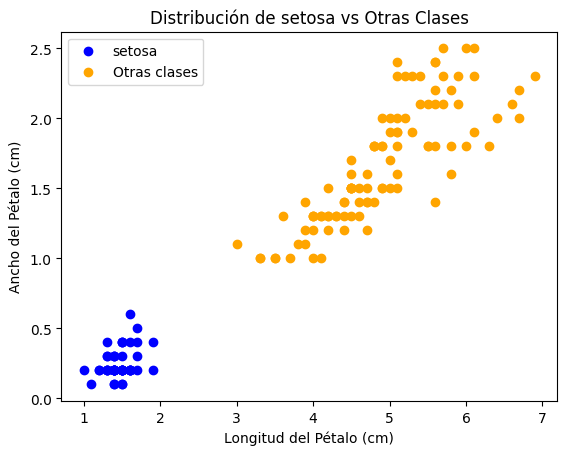

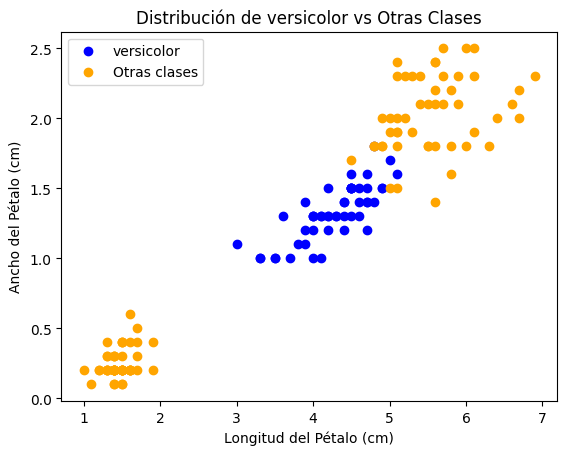

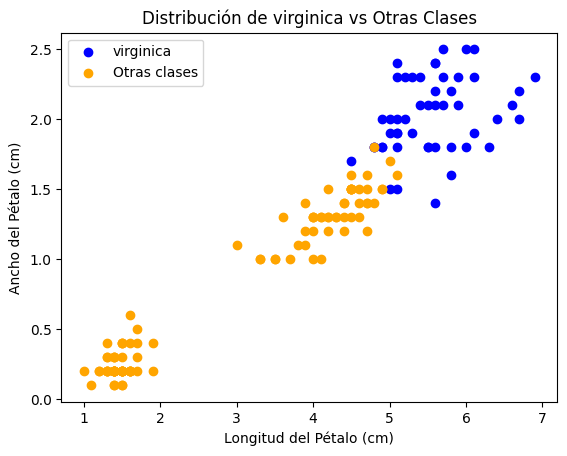

In [2]:
import matplotlib.pyplot as plt

# Creamos una función para visualizar las distribuciones por clase
def plot_class_distribution(X, y, class_index, class_name):
    # Filtramos las instancias de la clase específica
    X_class = X[y == class_index]

    # Filtramos las instancias de las otras dos clases
    X_other_classes = X[y != class_index]

    # Graficamos las instancias de la clase vs las otras dos clases
    plt.scatter(X_class[:, 0], X_class[:, 1], label=class_name, c='blue')
    plt.scatter(X_other_classes[:, 0], X_other_classes[:, 1], label='Otras clases', c='orange')
    plt.xlabel('Longitud del Pétalo (cm)')
    plt.ylabel('Ancho del Pétalo (cm)')
    plt.title(f'Distribución de {class_name} vs Otras Clases')
    plt.legend()
    plt.show()

# Graficamos las distribuciones para cada clase vs las otras dos clases
class_names = iris.target_names
for i, class_name in enumerate(class_names):
    plot_class_distribution(X, y, i, class_name)


Se puede osbervar, que en este caso particular la clases están representadas como un valor numérico tipo entero.

In [3]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
print(X)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

Se procede a realizar una extracción de los datos para la conformación de los datos de entrenamiento y testeo. En este caso particular, el 30% de 150 es 45, es decir 15 muestras para testeto por cada clase y asi mismo, 35 muestras de entrenamiento para cada clase.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [6]:
print('Conteno de etiquetas en y:', np.bincount(y))
print('Conteno de etiquetas en y_train:', np.bincount(y_train))
print('Conteno de etiquetas en y_test:', np.bincount(y_test))

Conteno de etiquetas en y: [50 50 50]
Conteno de etiquetas en y_train: [35 35 35]
Conteno de etiquetas en y_test: [15 15 15]


Se realiza un proceso de "Normalización" a los datos mediante la "Estandarización", es decir lograr que la media de las cada una de las características sea 0 y la desviación estandar sea 1.

Para esto, en este caso se usa la función "StandardScaler".

Si desea conocer más sobre ésto: [Función StandardScaler vía SCI-KIT LEARN](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
print(X_train_std)

[[-1.33269725 -1.30728421]
 [-1.16537974 -1.30728421]
 [ 0.84243039  1.44587881]
 [ 1.0655204   1.18367281]
 [-1.44424226 -1.30728421]
 [ 1.0097479   1.57698181]
 [ 1.56747294  1.18367281]
 [-1.44424226 -1.30728421]
 [ 1.12129291  0.5281578 ]
 [ 0.45202286  0.1348488 ]
 [-0.27301968 -0.2584602 ]
 [ 0.06161534  0.2659518 ]
 [-1.38846976 -1.30728421]
 [ 0.50779537  0.0037458 ]
 [ 0.11738784  0.1348488 ]
 [ 0.73088538  0.92146681]
 [-1.05383474 -1.30728421]
 [-0.16147468 -0.2584602 ]
 [ 0.06161534  0.0037458 ]
 [-1.22115225 -1.30728421]
 [ 0.56356787  0.79036381]
 [ 1.73479045  1.44587881]
 [ 0.39625036  0.3970548 ]
 [ 0.39625036  0.1348488 ]
 [ 0.00584283 -0.1273572 ]
 [ 1.0097479   1.57698181]
 [ 0.50779537  0.2659518 ]
 [ 1.0097479   0.2659518 ]
 [ 1.12129291  1.31477581]
 [ 0.73088538  1.57698181]
 [ 0.17316034  0.1348488 ]
 [-1.27692475 -1.04507821]
 [ 1.62324544  1.31477581]
 [ 0.67511288  0.92146681]
 [ 0.56356787  0.79036381]
 [ 1.0097479   1.18367281]
 [ 0.22893285  0.3970548 ]
 

Se valida la operación realizada anteriormente.

In [9]:
promedio_X1 = X_train_std[:,0].mean()
desv_estand_X1 = X_train_std[:,0].std()
promedio_X2 = X_train_std[:,1].mean()
desv_estand_X2 = X_train_std[:,1].std()

print("Promedio de la característica 1 X1: " + str(promedio_X1))
print("Promedio de la característica 1 X1: " + str(desv_estand_X1))
print("Promedio de la característica 2 X2: " + str(promedio_X2))
print("Promedio de la característica 2 X2: " + str(desv_estand_X2))

Promedio de la característica 1 X1: 1.1207965772406342e-16
Promedio de la característica 1 X1: 1.0
Promedio de la característica 2 X2: 6.97854472621527e-17
Promedio de la característica 2 X2: 0.9999999999999997


Se introduce el uso de la Máquina de Vector de Soporte (SVM), que pertenece en este caso a la librería SCI-KIT LEARN dentro de las sub-funciones de "linear_model", entendiendo que es un algoritmo, como ya se sabía, para solución de problemas que tengan la particularidad de separación lineal.

Si desea conocer más sobre la parametrización del algoritmo: [Máquinas de Vectores de Soporte vía SCI-KIT LEARN](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [10]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

# **Predicción:**

En arás del enfoque de Aprendizaje de Máquina, solo usando la función **"predict"** se obtiene la tradicional predicción deseada:

In [12]:
y_pred = svm.predict(X_test_std)

Se realiza la matriz de confusión para evaluar el comportamiento en la predicción de las 3 clases:

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcula la matriz de confusión
cm_svm_1 = confusion_matrix(y_test, y_pred)

print(cm_svm_1)

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


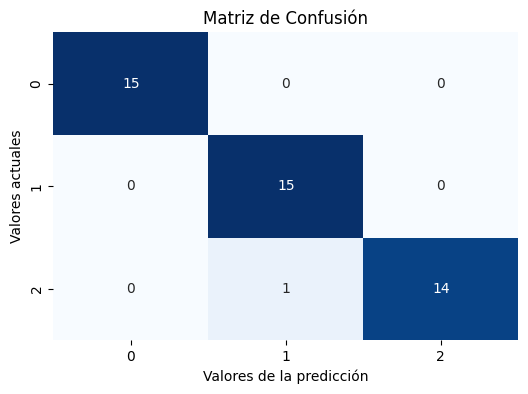

In [14]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm_1, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

Creación de la función para dibujar las regiones de seperación:

In [15]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl)




Se puede observar el resultado mediante el dibujo de la regiones de seperación sobre los datos de entrenamiento:

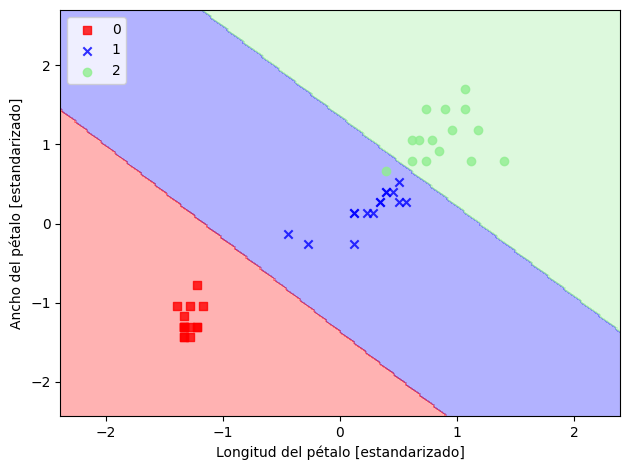

In [16]:
plot_decision_regions(X_test_std, y_test,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Longitud del pétalo [estandarizado]')
plt.ylabel('Ancho del pétalo [estandarizado]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Se procede a validar el cambio de C: 1000



In [21]:

svm2 = SVC(kernel='linear', C=1000, random_state=1)
svm2.fit(X_train_std, y_train)

SVC(C=1000, kernel='linear', random_state=1)

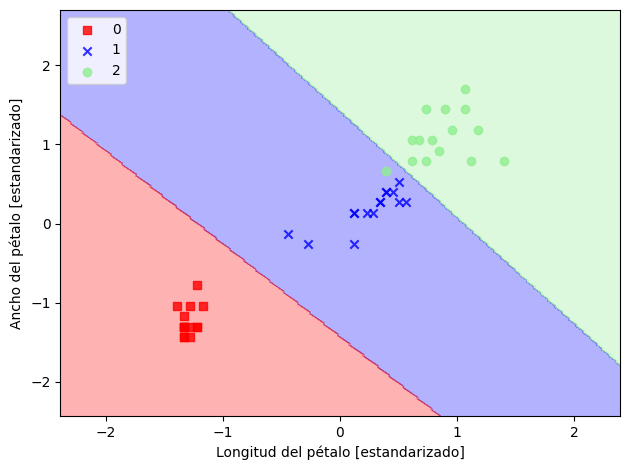

In [22]:
plot_decision_regions(X_test_std, y_test,
                      classifier=svm2, test_idx=range(105, 150))
plt.xlabel('Longitud del pétalo [estandarizado]')
plt.ylabel('Ancho del pétalo [estandarizado]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()